# Preliminary operations

## Import libraries

In [77]:
# import libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt 
import seaborn as sns
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Mount Google Drive

In [78]:
# mont Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data import

In [79]:
# import dataset
df = pd.read_csv("drive/MyDrive/Progetto Data Mining 2/DATASET/RavdessAudioOnlyFeatures_TRAIN.csv")
df_test = pd.read_csv("drive/MyDrive/Progetto Data Mining 2/DATASET/RavdessAudioOnlyFeatures_TEST.csv")
df_prep = df.copy()
df_prep_test = df_test.copy()

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Columns: 434 entries, modality to stft_skew_w4
dtypes: float64(405), int64(21), object(8)
memory usage: 6.1+ MB


In [81]:
df.head()

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename,frame_count,...,stft_max_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_q99_w4,stft_kur_w4,stft_skew_w4
0,audio-only,speech,neutral,normal,Kids are talking by the door,1st,1,M,03-01-01-01-01-01-01.wav,158558,...,1.0,0.000000,0.566462,0.709962,0.799141,0.896606,1.0,1.0,6.742190,-1.706215
1,audio-only,speech,neutral,normal,Kids are talking by the door,2nd,1,M,03-01-01-01-01-02-01.wav,160160,...,1.0,0.368623,0.472736,0.623183,0.744908,0.874713,1.0,1.0,-0.700420,-0.201495
2,audio-only,speech,neutral,normal,Dogs are sitting by the door,1st,1,M,03-01-01-01-02-01-01.wav,156956,...,1.0,0.000000,0.417919,0.643636,0.774253,0.899156,1.0,1.0,1.688986,-1.024773
3,audio-only,speech,neutral,normal,Dogs are sitting by the door,2nd,1,M,03-01-01-01-02-02-01.wav,152152,...,1.0,0.306280,0.399641,0.606910,0.755213,0.886474,1.0,1.0,-0.594111,-0.412871
4,audio-only,speech,calm,normal,Kids are talking by the door,1st,1,M,03-01-02-01-01-01-01.wav,169769,...,1.0,0.248765,0.428202,0.634815,0.759914,0.878014,1.0,1.0,0.126535,-0.620782


In [82]:
df_prep.columns[df_prep.isna().any()].tolist()

[]

#Data Understanding

In [ ]:
sns.catplot(data=df_prep, x="day", y="total_bill", hue="smoker", kind="box")

#Data Preparation

##Removal of useless attributes

In [83]:
# find and remove colums with a unique value
nunique = df_prep.nunique()
cols_to_drop = nunique[nunique == 1].index

df_prep.drop(cols_to_drop, axis=1, inplace=True)
df_prep_test.drop(cols_to_drop, axis=1, inplace=True)

In [84]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Columns: 382 entries, vocal_channel to stft_skew_w4
dtypes: float64(364), int64(11), object(7)
memory usage: 5.3+ MB


In [85]:
df_prep.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename,frame_count,sum,...,stft_std_w4,stft_min_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,speech,neutral,normal,Kids are talking by the door,1st,1,M,03-01-01-01-01-01-01.wav,158558,0.145081,...,0.155455,0.000000,0.000000,0.566462,0.709962,0.799141,0.896606,1.0,6.742190,-1.706215
1,speech,neutral,normal,Kids are talking by the door,2nd,1,M,03-01-01-01-01-02-01.wav,160160,0.114319,...,0.163183,0.270133,0.368623,0.472736,0.623183,0.744908,0.874713,1.0,-0.700420,-0.201495
2,speech,neutral,normal,Dogs are sitting by the door,1st,1,M,03-01-01-01-02-01-01.wav,156956,0.149963,...,0.190634,0.000000,0.000000,0.417919,0.643636,0.774253,0.899156,1.0,1.688986,-1.024773
3,speech,neutral,normal,Dogs are sitting by the door,2nd,1,M,03-01-01-01-02-02-01.wav,152152,0.139618,...,0.182551,0.205616,0.306280,0.399641,0.606910,0.755213,0.886474,1.0,-0.594111,-0.412871
4,speech,calm,normal,Kids are talking by the door,1st,1,M,03-01-02-01-01-01-01.wav,169769,0.137665,...,0.177069,0.177847,0.248765,0.428202,0.634815,0.759914,0.878014,1.0,0.126535,-0.620782


##Removal of duplicates

In [86]:
# dropping duplicates from the dataset
df_prep.drop_duplicates(inplace=True)

In [87]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1828 entries, 0 to 1827
Columns: 382 entries, vocal_channel to stft_skew_w4
dtypes: float64(364), int64(11), object(7)
memory usage: 5.3+ MB


##Correlations

In [88]:
corr = df_data = df_prep.loc[:, "frame_count":].corr()

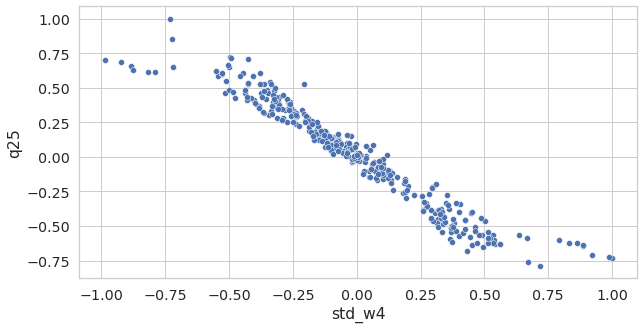

In [89]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)
sns.scatterplot(data=df_data, x="std_w4", y="q25")
plt.savefig("corr_1.svg")

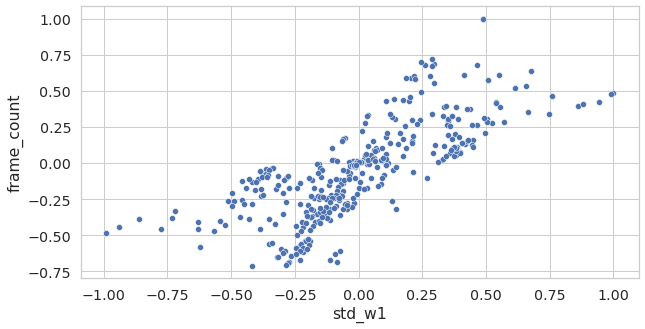

In [90]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)
sns.scatterplot(data=df_data, x="std_w1", y="frame_count")
plt.savefig("corr_2.svg")

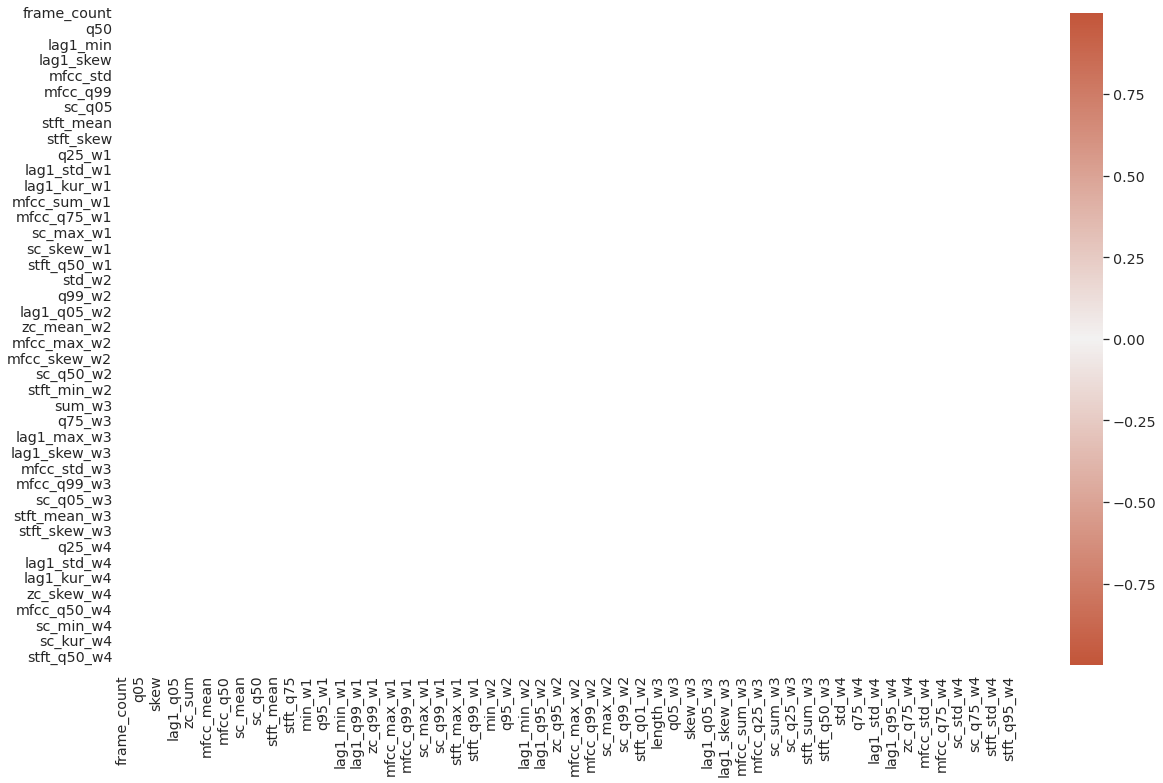

In [91]:
corr = df_data = df_prep.loc[:, "frame_count":].corr()
fig, ax = plt.subplots(figsize=(20, 12))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(20,20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, mask=mask, linewidths=.1) #Remove last element (not correlated)
plt.savefig("corr_matrix.svg", format="svg")
plt.show()

In [92]:
# get correlations matrix
cor_matrix = df_prep.corr().abs()
# cut the correlation matrix
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
# get attributes with a correaltion coeff higher then |0.75|
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]
print(to_drop)

#drop high correlated attributes
df_prep.drop(df_prep[to_drop].columns, axis=1, inplace=True)
df_prep_test.drop(df_prep_test[to_drop].columns, axis=1, inplace=True)

['mean', 'min', 'max', 'q01', 'q05', 'q75', 'q95', 'q99', 'lag1_mean', 'lag1_std', 'lag1_min', 'lag1_max', 'lag1_q01', 'lag1_q05', 'lag1_q25', 'lag1_q75', 'lag1_q95', 'lag1_q99', 'zc_mean', 'zc_std', 'zc_kur', 'zc_skew', 'mfcc_std', 'mfcc_min', 'mfcc_q01', 'mfcc_q50', 'mfcc_q99', 'sc_q01', 'sc_q05', 'sc_q50', 'sc_q75', 'sc_q95', 'sc_q99', 'sc_kur', 'sc_skew', 'stft_mean', 'stft_q01', 'stft_q05', 'stft_q25', 'stft_q50', 'stft_q75', 'stft_skew', 'length_w1', 'mean_w1', 'min_w1', 'max_w1', 'q01_w1', 'q05_w1', 'q75_w1', 'q95_w1', 'q99_w1', 'lag1_mean_w1', 'lag1_std_w1', 'lag1_min_w1', 'lag1_max_w1', 'lag1_q01_w1', 'lag1_q05_w1', 'lag1_q25_w1', 'lag1_q75_w1', 'lag1_q95_w1', 'lag1_q99_w1', 'lag1_kur_w1', 'zc_mean_w1', 'zc_std_w1', 'zc_q95_w1', 'zc_skew_w1', 'mfcc_mean_w1', 'mfcc_std_w1', 'mfcc_min_w1', 'mfcc_q01_w1', 'mfcc_q50_w1', 'mfcc_q75_w1', 'mfcc_skew_w1', 'sc_mean_w1', 'sc_min_w1', 'sc_max_w1', 'sc_q01_w1', 'sc_q05_w1', 'sc_q25_w1', 'sc_q50_w1', 'sc_q75_w1', 'sc_q95_w1', 'sc_q99_w1', 

<ipython-input-92-8194f83a6a77>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [93]:
df_prep.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename,frame_count,sum,...,mfcc_q95_w4,mfcc_q99_w4,mfcc_kur_w4,sc_std_w4,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_mean_w4,stft_q95_w4,stft_kur_w4
0,speech,neutral,normal,Kids are talking by the door,1st,1,M,03-01-01-01-01-01-01.wav,158558,0.145081,...,21.986026,48.030010,15.397974,1566.324873,25.150642,-4.175609,740.409892,0.791036,1.0,6.742190
1,speech,neutral,normal,Kids are talking by the door,2nd,1,M,03-01-01-01-01-02-01.wav,160160,0.114319,...,19.988556,64.458869,15.639326,1564.480577,-0.096686,-1.100390,705.975006,0.744699,1.0,-0.700420
2,speech,neutral,normal,Dogs are sitting by the door,1st,1,M,03-01-01-01-02-01-01.wav,156956,0.149963,...,22.595068,56.887385,15.492456,1713.750086,16.082550,-3.120218,694.365924,0.751478,1.0,1.688986
3,speech,neutral,normal,Dogs are sitting by the door,2nd,1,M,03-01-01-01-02-02-01.wav,152152,0.139618,...,26.935554,67.285285,15.302710,1464.156919,-0.332682,-0.880988,663.205667,0.736895,1.0,-0.594111
4,speech,calm,normal,Kids are talking by the door,1st,1,M,03-01-02-01-01-01-01.wav,169769,0.137665,...,22.696020,65.237851,15.577842,1711.334731,0.054656,-1.071109,741.412796,0.744390,1.0,0.126535


##Categorical Analysis

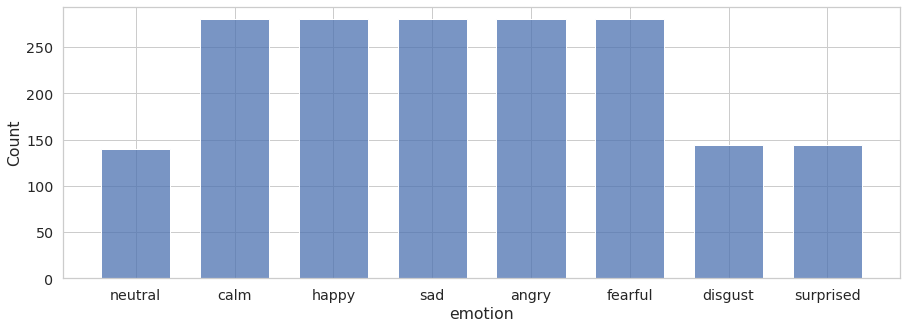

In [94]:
sns.set(rc={'figure.figsize':(15, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)
sns.histplot(df_prep, x="emotion", shrink=.7)
#plt.ylim(0, 80)
#plt.xlim(0, 0.3)
plt.savefig("bar_emotion.svg")

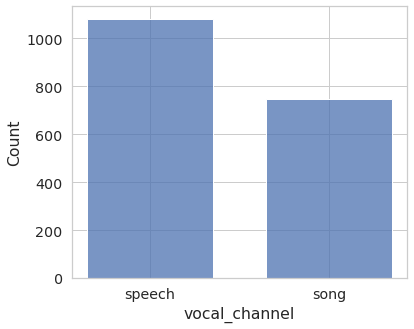

In [95]:
sns.set(rc={'figure.figsize':(6, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)
sns.histplot(df_prep, x="vocal_channel", shrink=.7)
#plt.ylim(0, 80)
#plt.xlim(0, 0.3)
plt.savefig("bar_vocal_channel.svg")

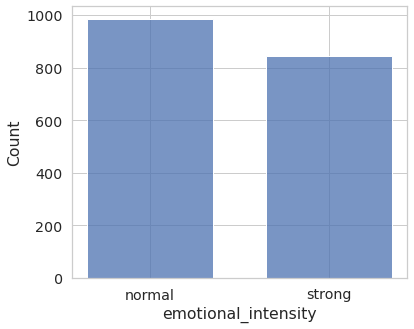

In [96]:
sns.set(rc={'figure.figsize':(6, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)
sns.histplot(df_prep, x="emotional_intensity", shrink=.7)
#plt.ylim(0, 80)
#plt.xlim(0, 0.3)
plt.savefig("bar_emotional_intensity.svg")

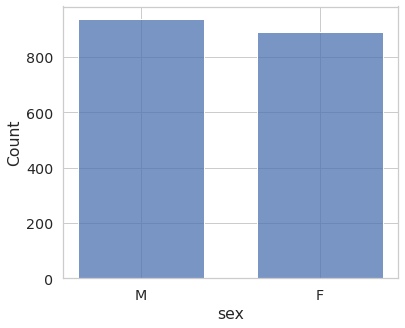

In [97]:
sns.set(rc={'figure.figsize':(6, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)
sns.histplot(df_prep, x="sex", shrink=.7)
#plt.ylim(0, 80)
#plt.xlim(0, 0.3)
plt.savefig("bar_sex.svg")

##Sqrt transformation

In [98]:
df_data

,frame_count,sum,mean,std,min,max,q01,q05,q25,q50,...,stft_std_w4,stft_min_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
frame_count,1.000000,-0.001099,0.004533,0.158799,-0.070880,0.071256,-0.130620,-0.209568,-0.457628,-0.009852,...,0.697197,-0.565253,-0.598888,-0.669007,-0.633444,-0.463814,-0.373344,-0.113230,-0.268661,0.207241
sum,-0.001099,1.000000,0.993536,-0.014775,-0.006276,-0.025954,0.016452,0.015872,0.054238,0.112678,...,0.020562,-0.026264,-0.036029,-0.023981,-0.018422,-0.016987,-0.009534,0.001863,-0.031391,0.019770
mean,0.004533,0.993536,1.000000,-0.012927,-0.006015,-0.025182,0.015152,0.012994,0.050623,0.111227,...,0.024861,-0.029100,-0.041398,-0.028608,-0.025225,-0.022784,-0.014263,0.001216,-0.039030,0.026173
std,0.158799,-0.014775,-0.012927,1.000000,-0.958339,0.953775,-0.996238,-0.989475,-0.571006,0.110824,...,0.116017,-0.117997,-0.116614,-0.128579,-0.157809,-0.188772,-0.178138,0.014961,-0.062052,0.149250
min,-0.070880,-0.006276,-0.006015,-0.958339,1.000000,-0.980120,0.961923,0.920902,0.473266,-0.132270,...,-0.026690,0.045934,0.038796,0.039066,0.076792,0.122776,0.117298,-0.019815,0.025486,-0.113142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
stft_q50_w4,-0.463814,-0.016987,-0.022784,-0.188772,0.122776,-0.119093,0.167583,0.216559,0.300006,0.048111,...,-0.610092,0.493462,0.522611,0.605563,0.867063,1.000000,0.931739,0.194854,0.434134,-0.854167
stft_q75_w4,-0.373344,-0.009534,-0.014263,-0.178138,0.117298,-0.118755,0.158855,0.199283,0.236782,0.054901,...,-0.436225,0.383171,0.404495,0.476773,0.729982,0.931739,1.000000,0.357968,0.263684,-0.846350
stft_q95_w4,-0.113230,0.001863,0.001216,0.014961,-0.019815,0.018447,-0.015378,-0.012977,0.013509,0.002275,...,-0.003195,0.028886,0.033358,0.043226,0.098416,0.194854,0.357968,1.000000,-0.304023,-0.248738
stft_kur_w4,-0.268661,-0.031391,-0.039030,-0.062052,0.025486,-0.018741,0.050023,0.086637,0.147702,-0.000437,...,-0.496007,0.161750,0.207170,0.434289,0.601911,0.434134,0.263684,-0.304023,1.000000,-0.557102


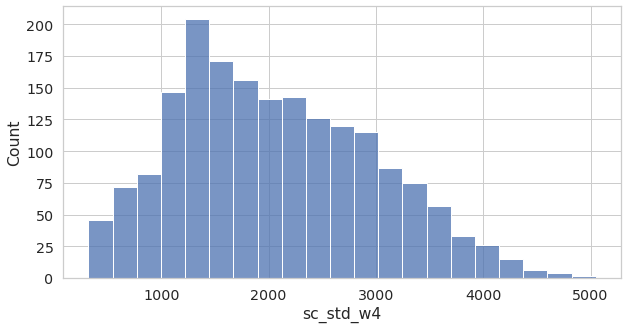

In [99]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)
sns.histplot(df_prep, x="sc_std_w4")
#plt.ylim(0, 80)
#plt.xlim(0, 0.3)
plt.savefig("dist_1.svg")

In [100]:
df_info = df_prep.loc[:, :"frame_count"]
df_data = df_prep.loc[:, "sum":]

df_info_test = df_prep_test.loc[:, :"frame_count"]
df_data_test = df_prep_test.loc[:, "sum":]

df_data_columns = df_data.columns

In [101]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1828 entries, 0 to 1827
Columns: 106 entries, sum to stft_kur_w4
dtypes: float64(102), int64(4)
memory usage: 1.5 MB


In [102]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.cbrt, validate=True)

In [103]:
transformer.fit(df_data)

df_data_tfmd = transformer.transform(df_data)
df_data_test_tfmd = transformer.transform(df_data_test)

In [104]:
df_data_tfmd = pd.DataFrame(df_data_tfmd, columns=df_data_columns)
df_data_test_tfmd = pd.DataFrame(df_data_test_tfmd, columns=df_data_columns)

<Axes: xlabel='sc_std_w4', ylabel='Count'>

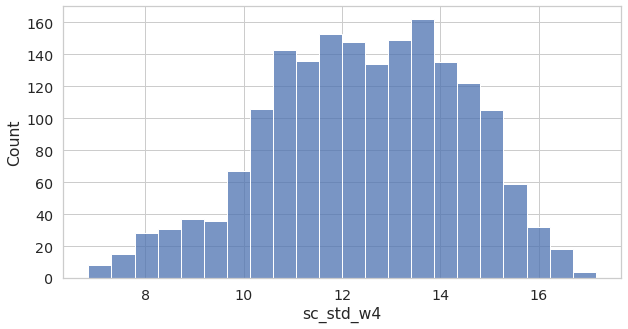

In [105]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)
sns.histplot(df_data_tfmd, x="sc_std_w4")
#plt.ylim(0, 80)
#plt.xlim(0, 0.3)

In [106]:
df_data_tfmd

,sum,std,q25,q50,kur,skew,lag1_sum,lag1_kur,lag1_skew,zc_sum,...,mfcc_q95_w4,mfcc_q99_w4,mfcc_kur_w4,sc_std_w4,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_mean_w4,stft_q95_w4,stft_kur_w4
0,0.525456,0.158749,-0.03125,0.0,2.467774,0.966930,0.000000,3.727413,0.873354,20.012492,...,2.801446,3.634998,2.487833,11.613433,2.929879,-1.610299,9.046711,0.924838,1.0,1.889152
1,0.485332,0.162403,-0.03125,0.0,2.545226,1.000526,0.000000,3.479539,0.961120,20.401070,...,2.713900,4.009537,2.500764,11.608873,-0.458974,-1.032402,8.904231,0.906415,1.0,-0.888082
2,0.531286,0.171945,0.00000,0.0,2.573056,1.082793,-0.039373,3.792072,0.685187,19.472897,...,2.827079,3.845965,2.492911,11.966923,2.524168,-1.461263,8.855154,0.909157,1.0,1.190900
3,0.518777,0.169690,-0.03125,0.0,2.794569,1.216367,-0.031250,3.756485,0.939291,20.195581,...,2.997611,4.067305,2.482692,11.355228,-0.692909,-0.958643,8.720661,0.903237,1.0,-0.840664
4,0.516346,0.143522,-0.03125,0.0,2.365479,0.852411,-0.031250,3.540310,0.698883,19.864923,...,2.831283,4.025624,2.497482,11.961298,0.379500,-1.023163,9.050794,0.906289,1.0,0.502038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,-0.536567,0.175425,0.00000,0.0,1.866688,-0.759304,0.000000,3.453405,-0.502355,20.286704,...,2.448081,3.783304,2.517485,15.568826,0.967167,-1.137565,8.710063,0.872171,1.0,0.640615
1824,-0.518852,0.206362,-0.03125,0.0,2.133154,-0.430175,0.000000,4.036372,0.481734,21.855108,...,2.303887,4.153931,2.530887,15.358903,0.982046,-1.091757,8.591270,0.850154,1.0,-0.950142
1825,-0.595304,0.214963,0.00000,0.0,1.804370,-0.298445,0.000000,3.853214,0.597098,19.521125,...,2.505716,4.211652,2.528193,14.188749,1.358187,-1.137705,8.580783,0.859225,1.0,-0.869175
1826,-0.441189,0.230339,-0.03125,0.0,1.648790,-0.474743,0.000000,3.294048,0.283911,23.272745,...,2.370012,3.794282,2.539529,15.875948,-0.273580,-1.050964,8.794167,0.853992,1.0,-0.793183


##Standard Scaling

In [107]:
from sklearn.preprocessing import StandardScaler
mm_scaler = StandardScaler()

mm_scaler.fit(df_data_tfmd)

df_data_scaled = mm_scaler.transform(df_data_tfmd)
df_data_test_scaled = mm_scaler.transform(df_data_test_tfmd)

In [108]:
df_data_scaled = pd.DataFrame(df_data_scaled, columns=df_data_columns)
df_data_test_scaled = pd.DataFrame(df_data_test_scaled, columns=df_data_columns)

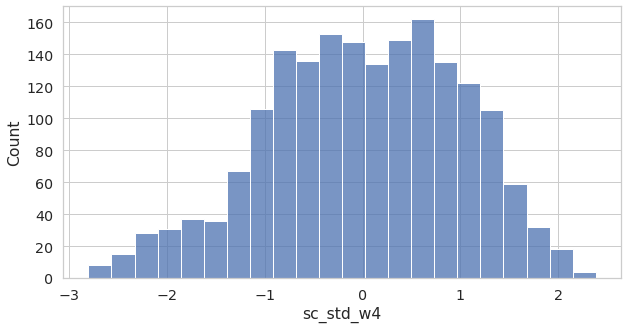

In [109]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)
sns.histplot(df_data_scaled, x="sc_std_w4")
#plt.ylim(0, 80)
#plt.xlim(0, 0.3)
plt.savefig("dist_2.svg")

##Export files

In [110]:
df_data_scaled

,sum,std,q25,q50,kur,skew,lag1_sum,lag1_kur,lag1_skew,zc_sum,...,mfcc_q95_w4,mfcc_q99_w4,mfcc_kur_w4,sc_std_w4,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_mean_w4,stft_q95_w4,stft_kur_w4
0,0.604904,-1.113727,1.155846,-0.064505,0.746422,1.597947,0.032809,0.526054,0.663058,-1.434221,...,-0.583254,-1.515480,-0.248903,-0.405919,3.146246,-1.505367,0.202942,1.325865,0.035922,3.971428
1,0.565092,-1.067513,1.155846,-0.064505,0.941449,1.648120,0.032809,0.186319,0.920248,-1.261744,...,-0.816861,-0.814428,0.141589,-0.408215,-0.236257,-0.713717,-0.120760,0.953175,0.035922,-0.381447
2,0.610689,-0.946842,1.891250,-0.064505,1.011526,1.770978,-0.885806,0.614675,0.111653,-1.673729,...,-0.514856,-1.120598,-0.095555,-0.227969,2.741296,-1.301205,-0.232259,1.008646,0.035922,2.877028
3,0.598277,-0.975367,1.155846,-0.064505,1.569306,1.970460,-0.696296,0.565900,0.856282,-1.352954,...,-0.059808,-0.706300,-0.404156,-0.535901,-0.469754,-0.612675,-0.537815,0.888896,0.035922,-0.307128
4,0.595865,-1.306279,1.155846,-0.064505,0.488840,1.426924,-0.696296,0.269613,0.151788,-1.499722,...,-0.503638,-0.784317,0.042496,-0.230801,0.600646,-0.701060,0.212217,0.950638,0.035922,1.797345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,-0.448868,-0.902835,1.891250,-0.064505,-0.767136,-0.980030,0.032809,0.150501,-3.368334,-1.312508,...,-1.526170,-1.237886,0.646538,1.585257,1.187212,-0.857777,-0.561894,0.260420,0.035922,2.014543
1824,-0.431290,-0.511622,1.155846,-0.064505,-0.096165,-0.488505,0.032809,0.949512,-0.484549,-0.616345,...,-1.910937,-0.544155,1.051251,1.479580,1.202063,-0.795026,-0.831780,-0.184982,0.035922,-0.478717
1825,-0.507148,-0.402853,1.891250,-0.064505,-0.924055,-0.291778,0.032809,0.698476,-0.146484,-1.652322,...,-1.372378,-0.436113,0.969906,0.890515,1.577499,-0.857969,-0.855605,-0.001462,0.035922,-0.351814
1826,-0.354231,-0.208407,1.155846,-0.064505,-1.315813,-0.555063,0.032809,-0.067914,-1.064250,0.012896,...,-1.734490,-1.217337,1.312235,1.739865,-0.051210,-0.739145,-0.370817,-0.107334,0.035922,-0.232709


###Export data

In [111]:
df_data_scaled.to_excel("df_prep_TRAIN.xlsx",
             sheet_name='Prepared Data Set') 

In [112]:
df_data_test_scaled.to_excel("df_prep_TEST.xlsx",
             sheet_name='Prepared Data Set') 

###Export Info

In [113]:
df_info.to_excel("df_prep_info_TRAIN.xlsx",
             sheet_name='Prepared Data Set')

In [114]:
df_info_test.to_excel("df_prep_info_TEST.xlsx",
             sheet_name='Prepared Data Set') 

#Data Subdivision